# Internet Privacy Poll

## Problem 1.1 - Loading and Summarizing the Dataset
Load the dataset from AnonymityPoll.csv into a data frame called poll.

How many people participated in the poll?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


poll = pd.read_csv('../data/AnonymityPoll.csv')
poll.shape[0]

1002

## Problem 1.2 - Loading and Summarizing the Dataset
Let's look at the breakdown of the number of people with smartphones.

How many interviewees responded that they use a smartphone?
- 487

How many interviewees responded that they don't use a smartphone?
- 472

In [2]:
poll['Smartphone'].value_counts()

1.0    487
0.0    472
Name: Smartphone, dtype: int64

How many interviewees did not respond to the question, resulting in a missing value, or NA?

In [3]:
poll['Smartphone'].isnull().sum()

43

## Problem 1.3 - Loading and Summarizing the Dataset
Which of the following are states in the Midwest census region? (Select all that apply.)
- Kansas
- Missouri
- Ohio

In [4]:
poll[poll['Region']=='Midwest']['State'].unique()

array(['Michigan', 'Ohio', 'Indiana', 'Minnesota', 'North Dakota',
       'Wisconsin', 'Missouri', 'Illinois', 'Nebraska', 'South Dakota',
       'Kansas', 'Iowa'], dtype=object)

Which was the state in the South census region with the largest number of interviewees?

In [5]:
poll[poll['Region']=='South']['State'].value_counts().sort_values(ascending=False).head(1)

Texas    72
Name: State, dtype: int64

## Problem 2.1 - Internet and Smartphone Users
How many interviewees reported not having used the Internet and not having used a smartphone?
- 186

How many interviewees reported having used the Internet and having used a smartphone?
- 470

How many interviewees reported having used the Internet but not having used a smartphone?
- 285

How many interviewees reported having used a smartphone but not having used the Internet?
- 17

In [6]:
pd.crosstab(poll['Internet.Use'], poll['Smartphone'])

Smartphone,0.0,1.0
Internet.Use,,
0.0,186,17
1.0,285,470


## Problem 2.2 - Internet and Smartphone Users
How many interviewees have a missing value for their Internet use?
- 1

How many interviewees have a missing value for their smartphone use?
- 43

In [7]:
poll[['Internet.Use', 'Smartphone']].isnull().sum()

Internet.Use     1
Smartphone      43
dtype: int64

## Problem 2.3 - Internet and Smartphone Users
Obtain a data frame called "limited", which is limited to interviewees who reported Internet use or who reported smartphone use. In lecture, we used the & symbol to use two criteria to make a subset of the data. To only take observations that have a certain value in one variable or the other, the | character can be used in place of the & symbol. This is also called a logical "or" operation.

How many interviewees are in the new data frame?

In [8]:
limited = poll[(poll['Internet.Use']==1.0) | (poll['Smartphone']==1.0)]
limited.shape[0]

792

*Important: For all remaining questions in this assignment please use the limited data frame you created in Problem 2.3.*

## Problem 3.1 - Summarizing Opinions about Internet Privacy
Which variables have missing values in the limited data frame?
- Smartphone
- Age
- Conservativeness
- Worry.About.Info
- Privacy.Importance
- Anonymity.Possible
- Tried.Masking.Identity
- Privacy.Laws.Effective

In [9]:
limited.isnull().sum()

Internet.Use               0
Smartphone                20
Sex                        0
Age                       22
State                      0
Region                     0
Conservativeness          45
Info.On.Internet           0
Worry.About.Info           2
Privacy.Importance         5
Anonymity.Possible        39
Tried.Masking.Identity     8
Privacy.Laws.Effective    65
dtype: int64

## Problem 3.2 - Summarizing Opinions about Internet Privacy
What is the average number of pieces of personal information on the Internet, according to the Info.On.Internet variable?

In [10]:
poll['Info.On.Internet'].mean()

3.7954545454545454

## Problem 3.3 - Summarizing Opinions about Internet Privacy
How many interviewees reported a value of 0 for Info.On.Internet?
- 105

How many interviewees reported the maximum value of 11 for Info.On.Internet?
- 8 

In [11]:
limited['Info.On.Internet'].value_counts()

0.0     105
4.0     104
3.0     101
2.0      95
5.0      94
1.0      84
6.0      67
7.0      63
8.0      40
9.0      18
10.0     13
11.0      8
Name: Info.On.Internet, dtype: int64

## Problem 3.4 - Summarizing Opinions about Internet Privacy
What proportion of interviewees who answered the Worry.About.Info question worry about how much information is available about them on the Internet? *Note that to compute this proportion you will be dividing by the number of people who answered the Worry.About.Info question, not the total number of people in the data frame.*

In [12]:
limited[limited['Worry.About.Info'].notnull()]['Worry.About.Info'].mean()

0.48860759493670886

## Problem 3.5 - Summarizing Opinions about Internet Privacy
What proportion of interviewees who answered the Anonymity.Possible question think it is possible to be completely anonymous on the Internet?

In [13]:
limited[limited['Anonymity.Possible'].notnull()]['Anonymity.Possible'].mean()

0.3691899070385126

## Problem 3.6 - Summarizing Opinions about Internet Privacy
What proportion of interviewees who answered the Tried.Masking.Identity question have tried masking their identity on the Internet?

In [14]:
limited[limited['Tried.Masking.Identity'].notnull()]['Tried.Masking.Identity'].mean()

0.16326530612244897

## Problem 3.7 - Summarizing Opinions about Internet Privacy
What proportion of interviewees who answered the Privacy.Laws.Effective question find United States privacy laws effective?

In [15]:
limited[limited['Privacy.Laws.Effective'].notnull()]['Privacy.Laws.Effective'].mean()

0.2558459422283356

## Problem 4.1 - Relating Demographics to Polling Results
Often, we are interested in whether certain characteristics of interviewees (e.g. their age or political opinions) affect their opinions on the topic of the poll (in this case, opinions on privacy). In this section, we will investigate the relationship between the characteristics Age and Smartphone and outcome variables Info.On.Internet and Tried.Masking.Identity, again using the limited data frame we built in an earlier section of this problem.

Build a histogram of the age of interviewees. What is the best represented age group in the population?

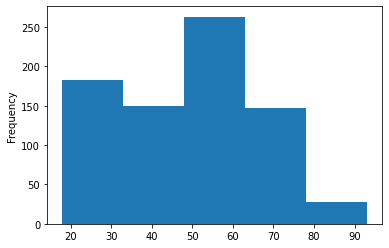

In [16]:
limited['Age'].plot.hist(bins=5);

## Problem 4.2 - Relating Demographics to Polling Results
Both Age and Info.On.Internet are variables that take on many values, so a good way to observe their relationship is through a graph. However, because Info.On.Internet takes on a small number of values, multiple points will be plotted in exactly the same location on this graph, making the distribution hard to see.

What is the largest number of interviewees that have exactly the same value in their Age variable AND the same value in their Info.On.Internet variable? In other words, if interviewees are separated into "buckets" by their Age and Info.On.Internet, what is the size of the largest bucket?
- 6

In [17]:
limited.groupby(['Info.On.Internet', 'Age'])['Age'].count().sort_values(ascending=False).head(4)

Info.On.Internet  Age 
0.0               53.0    6
                  60.0    6
1.0               60.0    6
4.0               39.0    5
Name: Age, dtype: int64

## Problem 4.4 - Relating Demographics to Polling Results
Now, plot Age against Info.On.Internet with jitter. What relationship to you observe between Age and Info.On.Internet?
- Older age seems moderately associated with a smaller value for Info.On.Internet correct

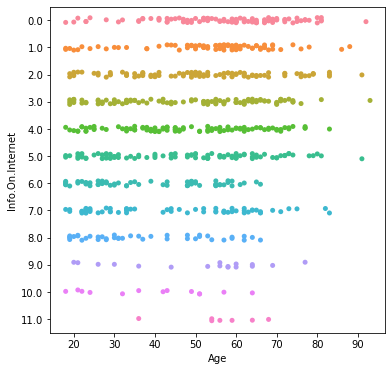

In [18]:
fig, ax = plt.subplots(figsize=[6,6])
sns.stripplot(x='Age', y='Info.On.Internet', data=limited, orient='h', jitter=True);

## Problem 4.5 - Relating Demographics to Polling Results
What is the average Info.On.Internet value for smartphone users?

In [19]:
limited[limited['Smartphone']==1.0]['Info.On.Internet'].mean()

4.367556468172484

What is the average Info.On.Internet value for non-smartphone users?

In [20]:
limited[limited['Smartphone']==0.0]['Info.On.Internet'].mean()

2.92280701754386

## Problem 4.6 - Relating Demographics to Polling Results
What proportion of smartphone users who answered the Tried.Masking.Identity question have tried masking their identity when using the Internet?

In [21]:
limited[limited['Smartphone']==1.0]['Tried.Masking.Identity'].mean()

0.19254658385093168

What proportion of non-smartphone users who answered the Tried.Masking.Identity question have tried masking their identity when using the Internet?

In [22]:
limited[limited['Smartphone']==0.0]['Tried.Masking.Identity'].mean()

0.11743772241992882